# The Sparks Foundation 

# Data Science And Business Analytics Internship (july - 2022)

# Author : Manogna Nalluri

# Task-1 : Prediction unsing supervised machine learning

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('marks_prediction.csv')
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
df.columns.values

array(['Hours', 'Scores'], dtype=object)

In [25]:
#check unique values in dataset
df.apply(lambda x: len(x.unique()))

Hours     23
Scores    23
dtype: int64

In [26]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [27]:
df.shape 

(25, 2)

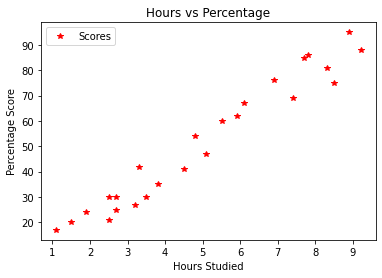

In [28]:
df.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Density'>

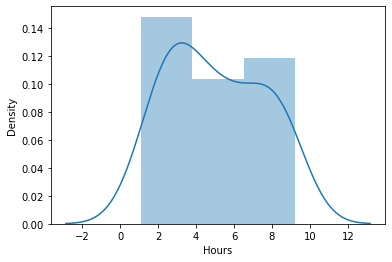

In [29]:
sns.distplot(df['Hours'])

<AxesSubplot:>

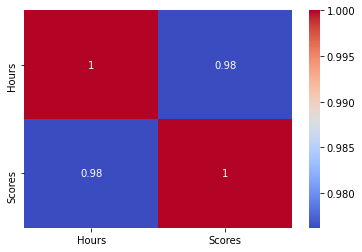

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm') 

In [31]:
x = df.drop(columns=['Scores'])
y = df['Hours']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [46]:
y_pred = model.predict(x_test)

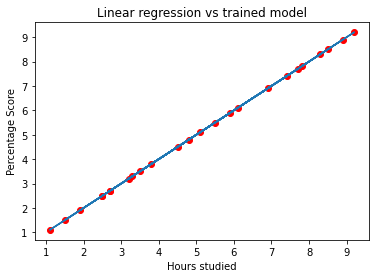

In [38]:
line = model.coef_*x+model.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(x, y,color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(x, line);
plt.show() 

In [39]:
model.score(x_test, y_test)

1.0

In [43]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = model.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 9.5


# Evaluating the model


In [44]:
from sklearn import metrics  

In [47]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error Is :  7.993605777301127e-16
Mean Squared Error Is :  1.143848312570467e-30
Root Mean Squared Error Is :  2.827296549232345e-08
